In [0]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten , Dense, Activation,Dropout
from keras.layers.advanced_activations import LeakyReLU
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
#Loading the data

(train_images1, train_labels1), (test_images1, test_labels1) = datasets.cifar10.load_data()

#saving a copy of data for resuse in later stages
(train_images, train_labels), (test_images, test_labels) = (train_images1, train_labels1), (test_images1, test_labels1)

In [0]:
#shapes of traing data and testing data

print("Shape of training data:")
print(train_images.shape)
print(train_labels.shape)
print("Shape of test data:")
print(test_images.shape)
print(test_labels.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


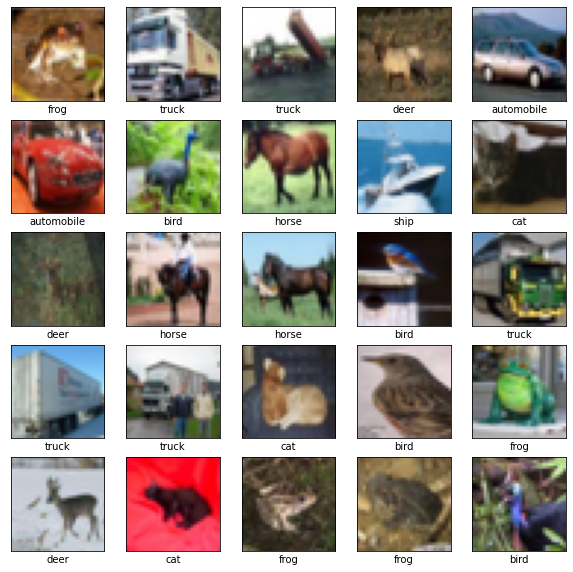

In [0]:
#plotting few images with their class names in a grid format

NUM_CLASSES = 10 #number of classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()  

In [0]:
#Fine-tune parameters

BATCH_SIZE = 32
IMG_HEIGHT = 32
IMG_WIDTH = 32
STEPS_PER_EPOCH = np.ceil(50000/BATCH_SIZE)

In [0]:
# function to transform label indices to one-hot encoded vectors

def one_hot(train_X,test_X,num_classes):
  train_X = to_categorical(train_X, num_classes=num_classes)
  test_X = to_categorical(test_X, num_classes=num_classes)
  return (train_X,test_X)


**First Version - normalization with mean 0 and standard deviation 1 = standardization **

- Normalizing entire training dataset 
- calculates the mean and standard deviation across all color channels in the loaded image, then uses these values to standardize the pixel values.
- Train the CNN model with standardised training data 
- Plotting the accuracy and loss for both training and testing data

In [0]:
#one hot encode  the train data labels and test data labels
(train_labels,test_labels) = one_hot(train_labels,test_labels,NUM_CLASSES)

In [0]:
#calculating mean and standard deviation channel wise and standardising the data 

mean = np.mean(train_images,axis = (1,2),keepdims = True)
std = np.std(train_images,axis = (1,2),keepdims = True)
images = (train_images-mean)/std


In [0]:
#printing the mean approximates to 0 and standard deviation is 1
print(np.mean(images))
print(np.std(images))

-7.277020421433041e-20
1.0


In [0]:
#CNN model 

def make_model():
     model = Sequential()
     model.add(Conv2D(16, (3, 3), padding ='same', activation = 'relu',input_shape = (IMG_WIDTH, IMG_HEIGHT, 3)))
     model.add(Conv2D(32, (3, 3), padding ='same', activation = 'relu',input_shape = (32, 32, 3)))                    # input shape maintained as same due to padding 
     model.add(MaxPooling2D(pool_size = (2,2), strides = None,padding = 'valid',data_format = None))
     model.add(Dropout(0.25))
     model.add(Conv2D(32, (3, 3), padding ='same', activation = 'relu',input_shape = (32, 32, 3)))
     model.add(Conv2D(64, (3, 3), padding ='same', activation = 'relu',input_shape = (32, 32, 3)))
     model.add(MaxPooling2D(pool_size = (2,2), strides = None,padding = 'valid',data_format = None))
     model.add(Dropout(0.25))
     model.add(Flatten())
     model.add(Dense(256, input_shape = (256, )))
     model.add(Dense(NUM_CLASSES))
     model.add(LeakyReLU(0.1))
     model.add(Activation('softmax'))
     return model

In [0]:
model = make_model()  # define our model

#model.summary()                                                                                                      # CNN model architecture

# prepare model for fitting (loss, optimizer, etc)

model.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['categorical_accuracy'])


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)         

In [0]:
# training the CNN model with epochs=50 
history = model.fit(images,train_labels,epochs=50,validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 16s 407us/step - loss: 1.4490 - categorical_accuracy: 0.4888 - val_loss: 1.0647 - val_categorical_accuracy: 0.6327
Epoch 2/50
40000/40000 [==============================] - 10s 247us/step - loss: 1.0476 - categorical_accuracy: 0.6331 - val_loss: 0.9456 - val_categorical_accuracy: 0.6729
Epoch 3/50
40000/40000 [==============================] - 10s 248us/step - loss: 0.9328 - categorical_accuracy: 0.6748 - val_loss: 0.8942 - val_categorical_accuracy: 0.6948
Epoch 4/50
40000/40000 [==============================] - 10s 245us/step - loss: 0.8606 - categorical_accuracy: 0.7005 - val_loss: 0.8305 - val_categorical_accuracy: 0.7153
Epoch 5/50
40000/40000 [==============================] - 10s 246us/step - loss: 0.8055 - categorical_accuracy: 0.7205 - val_loss: 0.8312 - val_categorical_accuracy: 0.7223
Epoch 6/50
40000/40000 [==============================] - 10s 246us/step - loss: 0.77

In [0]:
#after training , predicting values for testing images
test_prediction = model.predict_classes(test_images)

In [0]:
#converts class vectors into binary vector
test_prediction =to_categorical(test_prediction, num_classes=NUM_CLASSES)

In [0]:
# function to plot training data loss and validation data loss
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

# function to plot training data accuracy and validation data accuracy
def plotAccuracy(history):  
    plt.plot(history.history['categorical_accuracy'])
    plt.plot(history.history['val_categorical_accuracy'])
    plt.title('model Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

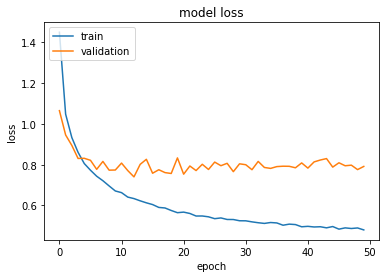

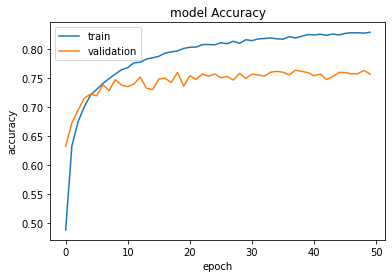

In [0]:
#function calling to plot loss and accuracy
plotLosses(history)
plotAccuracy(history)

In [0]:
#text report for precision , recall and f1 score for each class
classification_report(test_labels, test_prediction)

'              precision    recall  f1-score   support\n\n           0       0.13      0.02      0.03      1000\n           1       0.34      0.19      0.24      1000\n           2       0.18      0.30      0.23      1000\n           3       0.18      0.33      0.24      1000\n           4       0.23      0.15      0.18      1000\n           5       0.23      0.21      0.22      1000\n           6       0.42      0.48      0.45      1000\n           7       0.28      0.38      0.32      1000\n           8       0.50      0.00      0.01      1000\n           9       0.24      0.43      0.31      1000\n\n   micro avg       0.25      0.25      0.25     10000\n   macro avg       0.27      0.25      0.22     10000\nweighted avg       0.27      0.25      0.22     10000\n samples avg       0.25      0.25      0.25     10000\n'

**Second Version**
- Normalizing entire training dataset from 0 to 1 
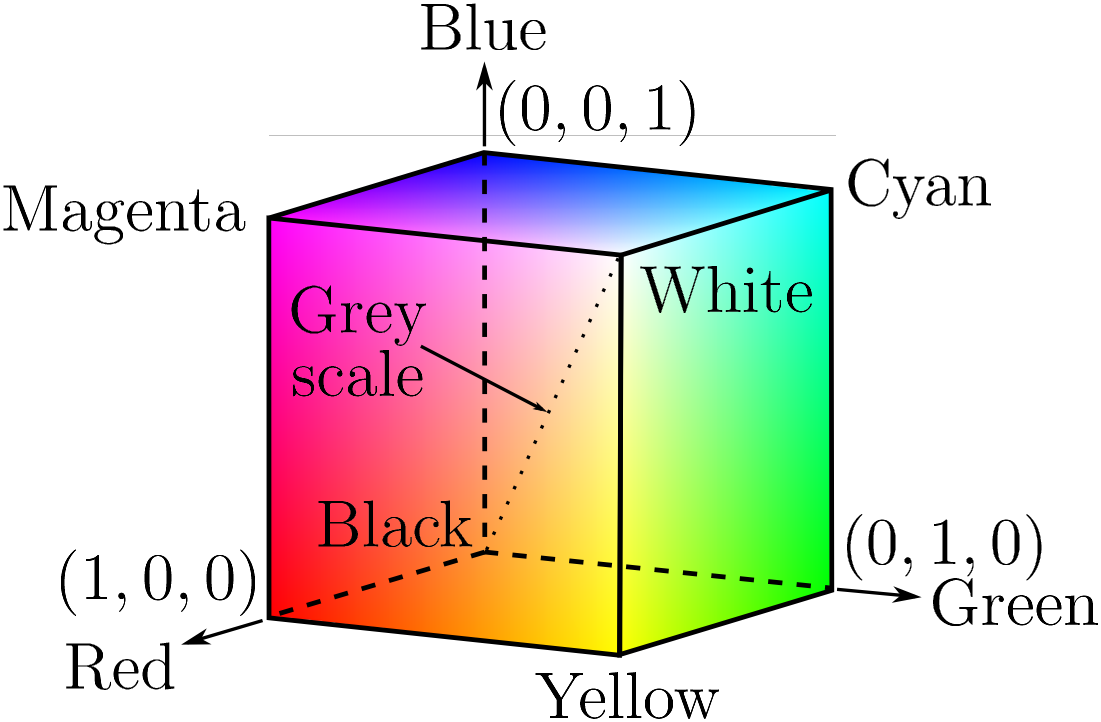
- Train the CNN model with standardised training data 
- Plotting the accuracy and loss for both training and testing data

In [0]:
(train_imagesnew, train_labels), (test_imagesnew, test_labels) = (train_images1, train_labels1), (test_images1, test_labels1)

In [0]:
# Normalizing the data whose values lie between 0 to 1

train_imagesnew = train_imagesnew/255.0
test_imagesnew = test_imagesnew/255.0

In [0]:
# # Transform label indices to one-hot encoded vectors

(train_labels,test_labels) = one_hot(train_labels,test_labels,NUM_CLASSES)

In [0]:
#to check wheather values lie between 0 and 1
print(train_imagesnew[1])

[[[0.60392157 0.69411765 0.73333333]
  [0.49411765 0.5372549  0.53333333]
  [0.41176471 0.40784314 0.37254902]
  ...
  [0.35686275 0.37254902 0.27843137]
  [0.34117647 0.35294118 0.27843137]
  [0.30980392 0.31764706 0.2745098 ]]

 [[0.54901961 0.62745098 0.6627451 ]
  [0.56862745 0.6        0.60392157]
  [0.49019608 0.49019608 0.4627451 ]
  ...
  [0.37647059 0.38823529 0.30588235]
  [0.30196078 0.31372549 0.24313725]
  [0.27843137 0.28627451 0.23921569]]

 [[0.54901961 0.60784314 0.64313725]
  [0.54509804 0.57254902 0.58431373]
  [0.45098039 0.45098039 0.43921569]
  ...
  [0.30980392 0.32156863 0.25098039]
  [0.26666667 0.2745098  0.21568627]
  [0.2627451  0.27058824 0.21568627]]

 ...

 [[0.68627451 0.65490196 0.65098039]
  [0.61176471 0.60392157 0.62745098]
  [0.60392157 0.62745098 0.66666667]
  ...
  [0.16470588 0.13333333 0.14117647]
  [0.23921569 0.20784314 0.22352941]
  [0.36470588 0.3254902  0.35686275]]

 [[0.64705882 0.60392157 0.50196078]
  [0.61176471 0.59607843 0.50980392]


In [0]:
#the model for training with normalised color train images
history2 = model.fit(train_imagesnew,train_labels,epochs=30,validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 10s 246us/step - loss: 0.7468 - categorical_accuracy: 0.7342 - val_loss: 0.7607 - val_categorical_accuracy: 0.7417
Epoch 2/30
40000/40000 [==============================] - 10s 246us/step - loss: 0.6141 - categorical_accuracy: 0.7832 - val_loss: 0.7357 - val_categorical_accuracy: 0.7502
Epoch 3/30
40000/40000 [==============================] - 10s 245us/step - loss: 0.5880 - categorical_accuracy: 0.7918 - val_loss: 0.7078 - val_categorical_accuracy: 0.7696
Epoch 4/30
40000/40000 [==============================] - 10s 246us/step - loss: 0.5678 - categorical_accuracy: 0.7991 - val_loss: 0.7369 - val_categorical_accuracy: 0.7569
Epoch 5/30
40000/40000 [==============================] - 10s 248us/step - loss: 0.5497 - categorical_accuracy: 0.8047 - val_loss: 0.7147 - val_categorical_accuracy: 0.7651
Epoch 6/30
40000/40000 [==============================] - 10s 251us/step - loss: 0.53

In [0]:
# predicting the values for testing image data 
test_prediction = model.predict_classes(test_images)

In [0]:
test_prediction =to_categorical(test_prediction, num_classes=NUM_CLASSES)

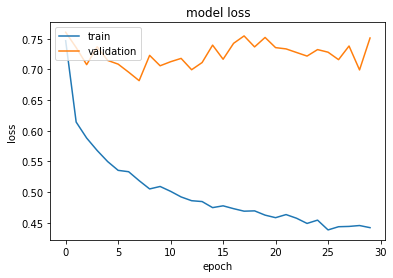

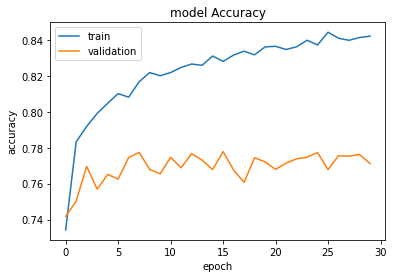

In [0]:
#plotiing training and validation loss and accuracy for above trained model
plotLosses(history2)
plotAccuracy(history2)

In [0]:
classification_report(test_labels, test_prediction)

'              precision    recall  f1-score   support\n\n           0       0.49      0.68      0.57      1000\n           1       0.65      0.81      0.72      1000\n           2       0.53      0.28      0.36      1000\n           3       0.40      0.29      0.34      1000\n           4       0.72      0.14      0.24      1000\n           5       0.45      0.60      0.52      1000\n           6       0.71      0.50      0.59      1000\n           7       0.42      0.80      0.55      1000\n           8       0.67      0.53      0.59      1000\n           9       0.63      0.75      0.68      1000\n\n   micro avg       0.54      0.54      0.54     10000\n   macro avg       0.57      0.54      0.52     10000\nweighted avg       0.57      0.54      0.52     10000\n samples avg       0.54      0.54      0.54     10000\n'

### **Second Version -**

- Normalizing entire training dataset from 0 to 1
- Converting images to gray scale, such that lies in range of black =0 and white =1
- Train the CNN model with standardised training data 
- Plotting the accuracy and loss for both training and testing data

In [0]:
len(train_imagesnew)

50000

In [0]:
# Converting all the images to gray scale

from skimage.color import rgb2gray

def rgb2gray_conversion(trainingImages):
  img = []
  for i in range(trainingImages.shape[0]):
          gray = rgb2gray(trainingImages[i])
          img.append(gray)
  return img


In [0]:
#function calling to convert color images to gray scale for making smaples to lie between 0- black and 1-white

train_gray = rgb2gray_conversion(train_imagesnew)

In [0]:
train_gray = np.asarray(train_gray)

#plotting converted gray image 
plt.imshow(train_gray[30],cmap=plt.cm.gray)


In [0]:
train_gray=train_gray.reshape(train_gray.shape[0],IMG_WIDTH,IMG_HEIGHT,1)

In [0]:
#CNN model for gray scaled images to train

def make_model_gray():
     model = Sequential()
     model.add(Conv2D(16, (3, 3), padding ='same', activation = 'relu',input_shape = (IMG_WIDTH, IMG_HEIGHT,1)))
     model.add(Conv2D(32, (3, 3), padding ='same', activation = 'relu',input_shape = (32, 32,1)))                    # input shape maintained as same due to padding 
     model.add(MaxPooling2D(pool_size = (2,2), strides = None,padding = 'valid',data_format = None))
     model.add(Dropout(0.25))
     model.add(Conv2D(32, (3, 3), padding ='same', activation = 'relu',input_shape = (32, 32,1)))
     model.add(Conv2D(64, (3, 3), padding ='same', activation = 'relu',input_shape = (32, 32,1)))
     model.add(MaxPooling2D(pool_size = (2,2), strides = None,padding = 'valid',data_format = None))
     model.add(Dropout(0.25))
     model.add(Flatten())
     model.add(Dense(256, input_shape = (256, )))
     model.add(Dense(NUM_CLASSES))
     model.add(LeakyReLU(0.1))
     model.add(Activation('softmax'))
     return model

In [0]:
model1 = make_model_gray()  # define our model

#model1.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 32, 32, 16)        160       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 64)         

In [0]:
                                                                                                      # CNN model architecture
# prepare model for fitting (loss, optimizer, etc)

model1.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['categorical_accuracy'])


In [0]:
#fitting the model for training gray scaled images

history3 = model1.fit(train_gray,train_labels,epochs=30,validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 10s 241us/step - loss: 1.6691 - categorical_accuracy: 0.3950 - val_loss: 1.3035 - val_categorical_accuracy: 0.5463
Epoch 2/30
40000/40000 [==============================] - 9s 235us/step - loss: 1.2563 - categorical_accuracy: 0.5595 - val_loss: 1.1341 - val_categorical_accuracy: 0.6008
Epoch 3/30
40000/40000 [==============================] - 9s 232us/step - loss: 1.1120 - categorical_accuracy: 0.6134 - val_loss: 1.0574 - val_categorical_accuracy: 0.6304
Epoch 4/30
40000/40000 [==============================] - 9s 233us/step - loss: 1.0294 - categorical_accuracy: 0.6417 - val_loss: 1.0104 - val_categorical_accuracy: 0.6501
Epoch 5/30
40000/40000 [==============================] - 9s 229us/step - loss: 0.9626 - categorical_accuracy: 0.6663 - val_loss: 0.9109 - val_categorical_accuracy: 0.6886
Epoch 6/30
40000/40000 [==============================] - 9s 229us/step - loss: 0.9156 - 

In [0]:
#converting the color test images to gray scale and preparing for prediction
test_gray = np.asarray(rgb2gray_conversion(test_images))
test_gray=test_gray.reshape(test_gray.shape[0],IMG_WIDTH,IMG_HEIGHT,1)

#prediction for test gray scaled images
test_prediction = model.predict_classes(test_gray)

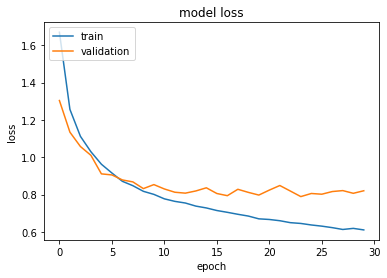

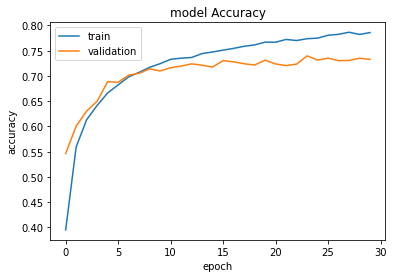

In [0]:
#plotting the accuray and loss for both training and validation data (gray-scaled)
plotLosses(history3)
plotAccuracy(history3)

In [0]:
test_prediction =to_categorical(test_prediction, num_classes=NUM_CLASSES)

In [0]:
classification_report(test_labels, test_prediction)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.07      0.01      0.01      1000\n           1       0.00      0.00      0.00      1000\n           2       0.08      0.01      0.01      1000\n           3       0.00      0.00      0.00      1000\n           4       0.03      0.01      0.02      1000\n           5       0.00      0.00      0.00      1000\n           6       0.08      0.45      0.14      1000\n           7       0.00      0.00      0.00      1000\n           8       0.00      0.00      0.00      1000\n           9       0.07      0.26      0.11      1000\n\n   micro avg       0.07      0.07      0.07     10000\n   macro avg       0.03      0.07      0.03     10000\nweighted avg       0.03      0.07      0.03     10000\n samples avg       0.07      0.07      0.07     10000\n'